## DataCamp Certification Case Study

### Project Brief
You are on the data science team for a coffee company that is looking to expand their business into Ukraine. They want to get an understanding of the existing coffee shop market there.

You have a dataset from Google businesses. It contains information about coffee shops in Ukraine. The marketing manager wants to identify the key coffee shop segments. They will use this to construct their marketing plan. In their current location, they split the market into 5 segments. The marketing manager wants to know how many segments are in this new market, and their key features.

You will be presenting your findings to the Marketing Manager, who has no data science background.

## 1. ASK
- Question:

1. Compare which city has the most rating and reviews.
2. Compare which place type has the most popular.
3. Compare Reviews of Place Type when it comes to Dine In Option.
4. Compare Reviews of Place Type when it comes to Takeout options.
5. How many shops provides all services, delivery, dine-in, and takeout options.

## 2.PREPARE
Dataset: https://www.kaggle.com/datasets/dimitryzub/10-coffee-places-from-ukrainian-cities?select=Ukraine+Cities+Coffee+Shops+Analysis+-+Main.csv

**Region**: Region where coffee shop is located<br>
**Place name**: Coffee shop name<br>
**Place type**: Coffee shop type<br>
**Rating**: Coffee shop rating<br>
**Reviews**: Coffee shop number of reviews<br>
**Price**: Coffee shop price range<br>
**Delivery Option**: Coffee shop delivery option<br>
**Dine In Option**: Coffee shop dine-in option<br>
**Take Out Option**: Coffee shop takeout option<br>

In [109]:
# Import Library
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import Dataset
df = pd.read_csv('coffee.csv')
df.head(10)

,Region,Place name,Place type,Rating,Reviews,Price,Delivery option,Dine in option,Takeout option
0,Mariupol,Dim Kavu,Coffee store,4.6,206.0,NaN,NaN,NaN,NaN
1,Mariupol,Коферум,Cafe,5.0,24.0,$$,False,NaN,True
2,Mariupol,Кофейня Світ Чаю,Coffee shop,5.0,11.0,NaN,NaN,NaN,True
3,Mariupol,Кофейня Starcoff,Coffee shop,4.4,331.0,$$,False,True,True
4,Mariupol,"Кофейня ""Friend Zone""",Coffee shop,5.0,12.0,NaN,NaN,True,True
5,Mariupol,Racers Coffee Shop,Espresso bar,4.6,367.0,$$,False,True,True
6,Mariupol,Займемся Кофе,Coffee shop,4.6,200.0,$$,False,True,True
7,Mariupol,Кофейня Rit Rit,Coffee shop,4.6,292.0,$$,False,NaN,True
8,Mariupol,Кав'ярня My coffee,Coffee shop,4.8,31.0,NaN,NaN,True,True
9,Mariupol,LENЬ. Coffee & desserts.,Coffee shop,4.8,125.0,$$,True,True,True


## 3.Process
First We had load and print the top five rows of our Dataset in the above cell. Then to get to more information on our data about the dataset

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           198 non-null    float64
 4   Reviews          198 non-null    float64
 5   Price            122 non-null    object 
 6   Delivery option  129 non-null    object 
 7   Dine in option   140 non-null    object 
 8   Takeout option   144 non-null    object 
dtypes: float64(2), object(7)
memory usage: 14.2+ KB


In [111]:
df.isna().sum()

Region              0
Place name          0
Place type          0
Rating              2
Reviews             2
Price              78
Delivery option    71
Dine in option     60
Takeout option     56
dtype: int64

In [112]:
# Take a look at the variables despite the missing values
print(df['Price'].unique())
print(df['Delivery option'].unique())
print(df['Takeout option'].unique())
print(df['Dine in option'].unique())


[nan '$$' '$' '$$$']
[nan False True]
[nan True]
[nan True]


We will replace the missing values with the average of the Rating and Reviews columns
The values of the remaining columns are Boolean and Symbolic values and cannot be averaged
1. Price value will be deleted due to not providing enough information
2. The Distribution column is neither "True" nor "False", this analysis replaces missing values with "unknown".
3. For dine-in and takeout services, the variables in these columns are the value "True" and the value is missing. Therefore, it is clear that the missing values must be "False", which means that the stores do not offer dine-in or take-out options.


In [113]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].mean())


df = df.drop("Price",axis=1)
df['Delivery option'] = df['Delivery option'].fillna("Unknow")
df['Dine in option'] = df['Dine in option'].fillna("False")
df['Takeout option'] = df['Takeout option'].fillna("False")
df.isna().sum()

Region             0
Place name         0
Place type         0
Rating             0
Reviews            0
Delivery option    0
Dine in option     0
Takeout option     0
dtype: int64

In [114]:
df['Reviews'] = df['Reviews'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Region           200 non-null    object 
 1   Place name       200 non-null    object 
 2   Place type       200 non-null    object 
 3   Rating           200 non-null    float64
 4   Reviews          200 non-null    int32  
 5   Delivery option  200 non-null    object 
 6   Dine in option   200 non-null    object 
 7   Takeout option   200 non-null    object 
dtypes: float64(1), int32(1), object(6)
memory usage: 11.8+ KB


## 4.ANALYZE

We will now perform a descriptive analysis of the data

Before we begin the analysis, it is a good idea to review basic descriptive statistics about the data.

In [115]:
df.describe()

,Rating,Reviews
count,200.000000,200.000000
mean,4.663636,622.490000
std,0.220531,1393.841198
min,3.900000,3.000000
25%,4.600000,48.500000
50%,4.700000,277.000000
75%,4.800000,780.750000
max,5.000000,17937.000000


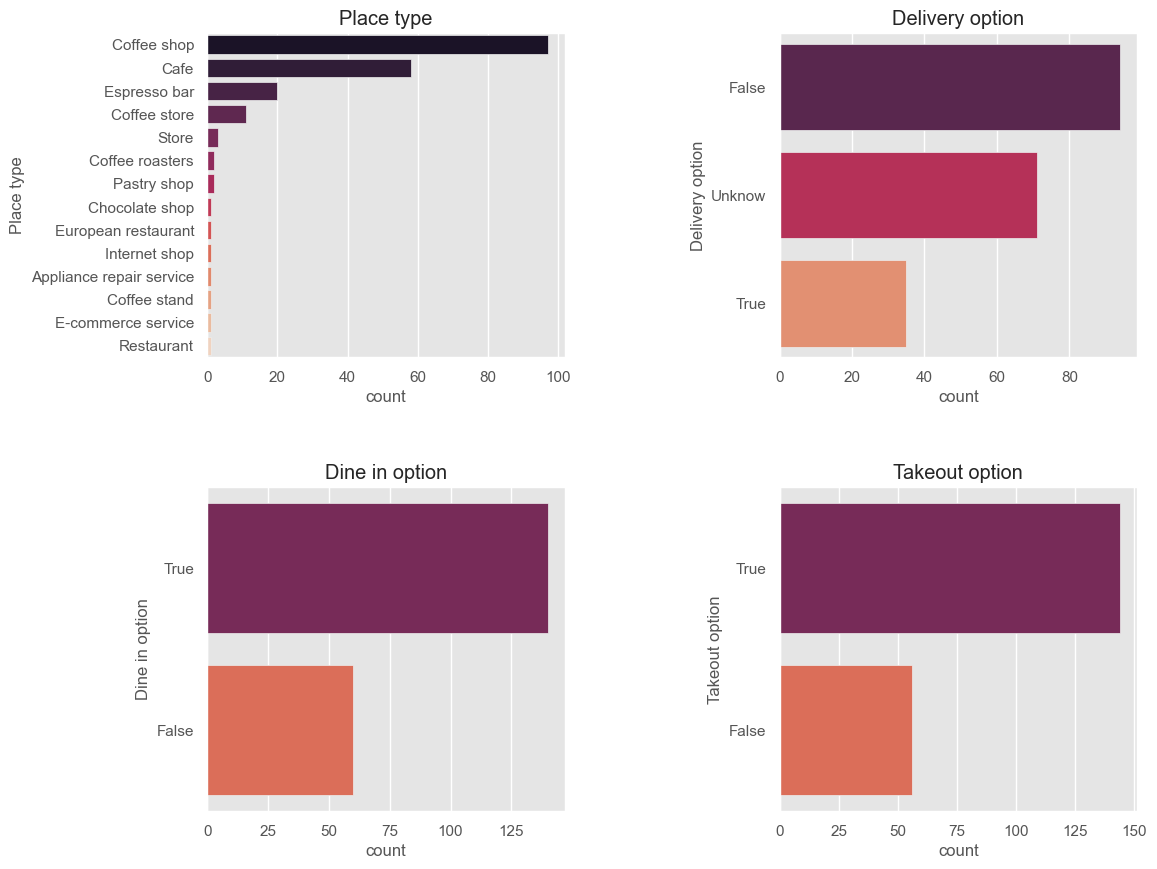

In [148]:
plt.figure(figsize=(12,16))
sns.set_style("darkgrid")
plt.style.use('ggplot') 
plt.subplots_adjust(hspace=0.4, wspace=0.6)
sns.set_palette("Spectral")
for i, cat_col in enumerate(['Place type', 'Delivery option', 'Dine in option', 'Takeout option']):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=cat_col, 
                  data=df, 
                  order=df[cat_col].value_counts().index,
                  palette="rocket")
    plt.title(cat_col)
    plt.xticks(rotation=0)
plt.show()

Reagarding the plots above, most places are coffee shops. Most of them do not have a delivery service but have dine-in and take-out options

Q1: Compare which city has the most rating and reviews.

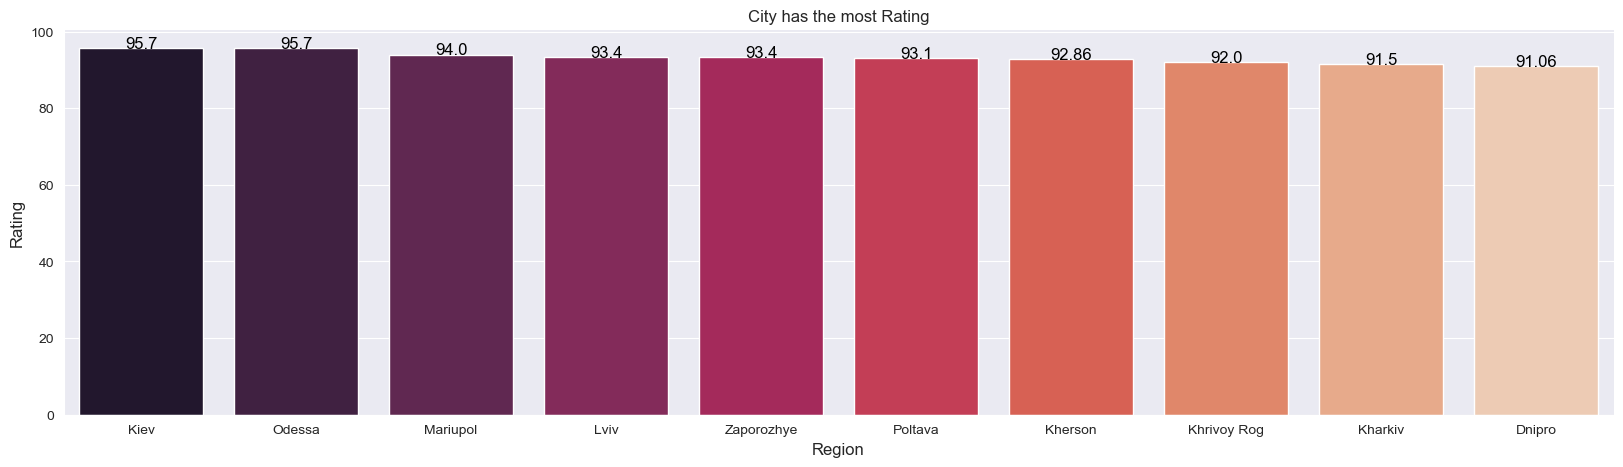

In [143]:
# Sort the Rating as per Region
rating_group = df.groupby("Region").sum().sort_values("Rating",ascending=False).round(2)
# Since we have used groupby, we will have to reset the index to add the product category into dataframe 
rating_group.reset_index(inplace= True)

plt.figure(figsize = (20,5)) # Width and Height of figure
sns.set_style("darkgrid")
sns.barplot(x = "Region",
            y = "Rating",
            data = rating_group,
            palette="rocket")
plt.xlabel("Region",size = 12) # x axis show the Region
plt.ylabel("Rating",size = 12) # y axis show the Rating
plt.title("City has the most Rating",size = 12)
for k,v in rating_group["Rating"].items(): # To show the exact Rating generated on the figure
    plt.text(k,v,str(v),
             fontsize = 12,
             color = 'k', 
             horizontalalignment = 'center')

sns.despine()


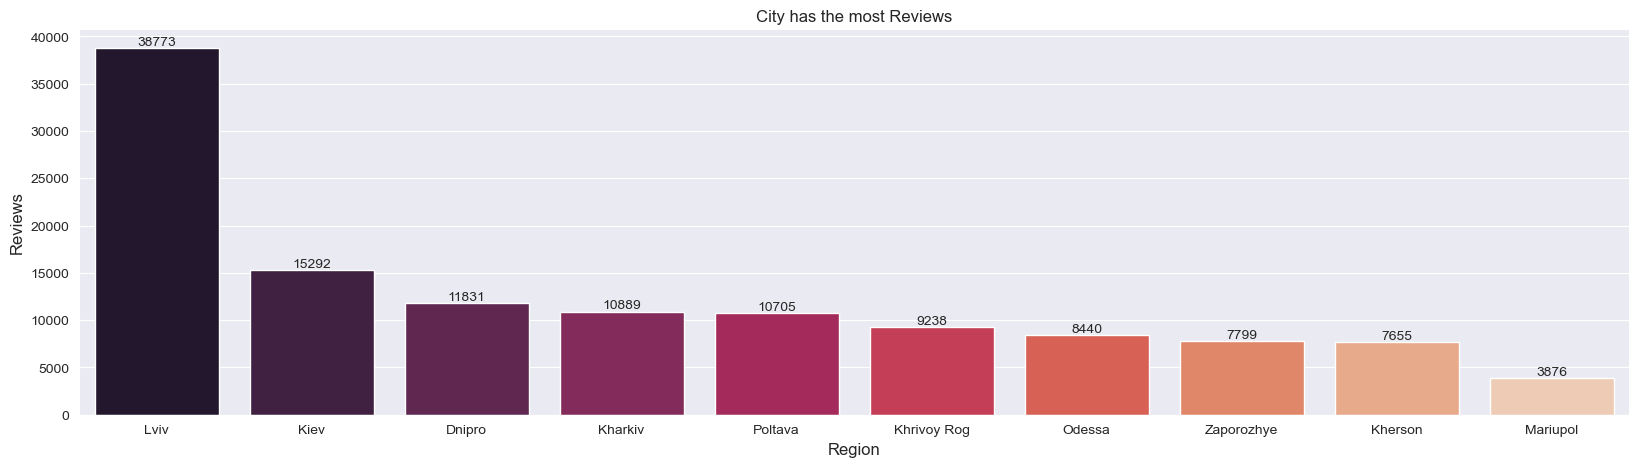

In [139]:
# Sort the Reviews as per Region
reviews_group = df.groupby("Region").sum().sort_values("Reviews",ascending=False).round(2)
# Since we have used groupby, we will have to reset the index to add the product category into dataframe 
reviews_group.reset_index(inplace= True)

plt.figure(figsize = (20,5)) # Width and Height of figure
sns.set_style("darkgrid")
sns.barplot(x = "Region",
            y = "Reviews",
            data = reviews_group,
            palette="rocket")
plt.xlabel("Region",size = 12) # x axis show the Region
plt.ylabel("Reviews",size = 12) # y axis show the Reviews
plt.title("City has the most Reviews",size = 12)
for k,v in reviews_group["Reviews"].items(): # To show the exact Reviews generated on the figure
    plt.text(k,v,str(v),
             fontsize = 12,
             color = 'k', 
             horizontalalignment = 'center')
sns.despine()

Through the 2 bar charts above, we see that Kiev is the city with the highest Rating and Lviv is the city with the highest Reviews.

Q2. Compare which place type has the most popular.

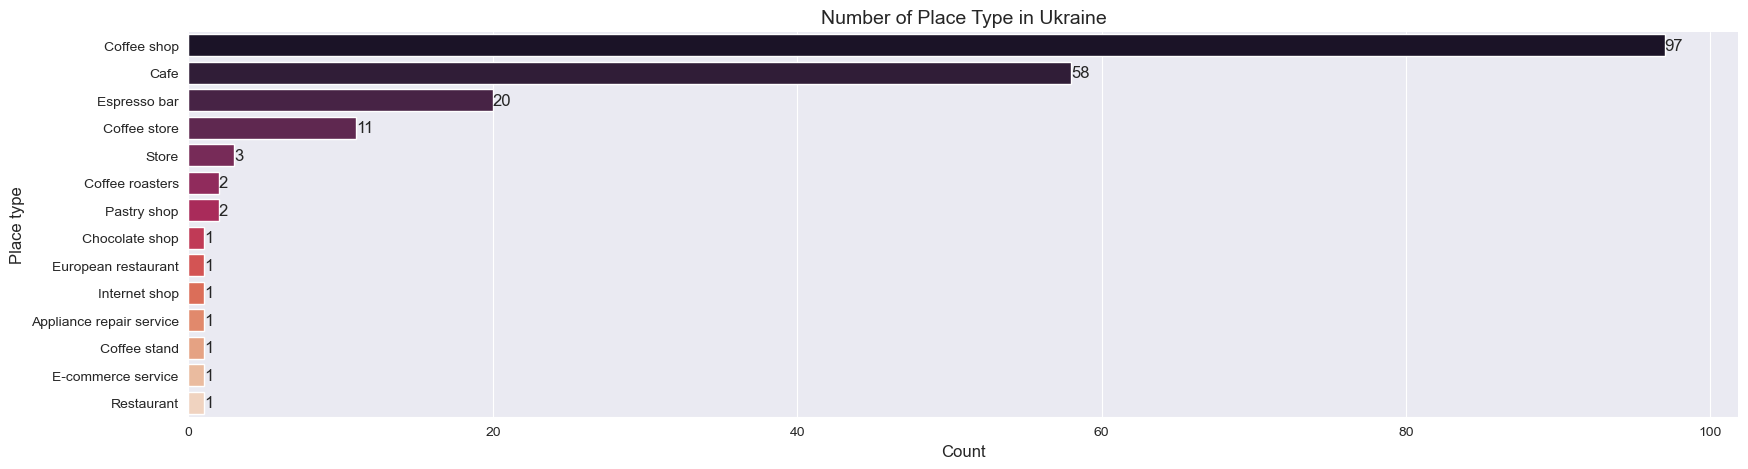

In [118]:
ordered = list(df["Place type"].value_counts().index)# To sort the place type

fig, ax = plt.subplots()
fig.set_size_inches(20,5)# Width and Height of figure
sns.set_style("darkgrid")
sns.countplot(y = "Place type",
              data = df,
              order= ordered,
              palette="rocket")
plt.xlabel("Count",size = 12)# x axis show the Region
plt.ylabel("Place type",size = 12)# y axis show the Reviews
plt.title("Number of Place Type in Ukraine", size=14)
ax.bar_label(ax.containers[0],fontsize = 12)# To show the exact Value generated on the figure
sns.despine()

As We can look at the upper bar graph We can easily see that Coffee shop is the most popular in Ukraine, Also Cafe then Espresso bar.

Q3. Compare Reviews of Place Type when it comes to Dine In Option.

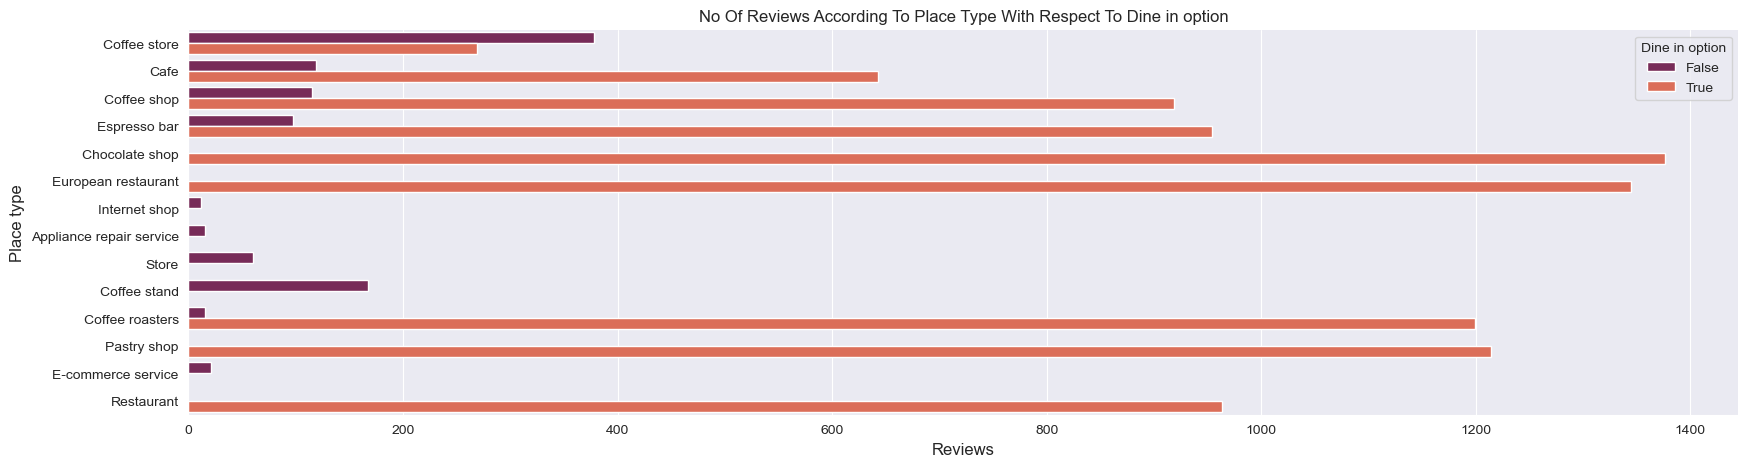

In [119]:
plt.figure(figsize=(20,5))
sns.set_style("darkgrid")
sns.barplot(x = 'Reviews',
            y = "Place type",
            hue = "Dine in option",
            data = df,
            palette = "rocket",
            ci = 0)
plt.xlabel("Reviews",size = 12)
plt.ylabel("Place type",size = 12)
plt.title("No Of Reviews According To Place Type With Respect To Dine in option",size = 12)
sns.despine()

In the Bar graph present above we can easily see that Chocolate shop and Europe restaurant are getting most number of reviews with respect to Dine in option 

However coffee shops are not so much famous in Dine in that is why they are getting less number of reviews than Chocolate shop, European Restaurant, Pastry shop and Coffee roasters...

Q4. Compare Reviews of Place Type when it comes to Takeout Option.

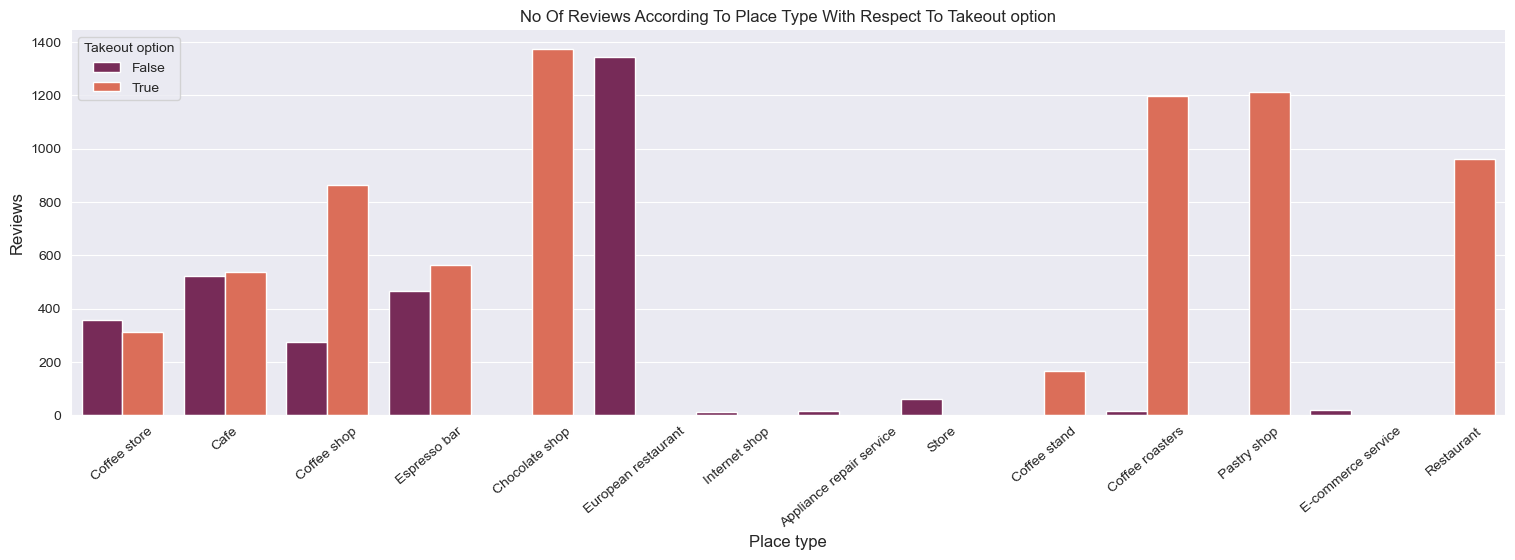

In [120]:
plt.figure(figsize=(18.5,5))
sns.set_style("darkgrid")
sns.barplot(x = 'Place type',
            y = "Reviews",
            hue = "Takeout option",
            data = df,
            palette = "rocket",
            ci = 0)
plt.xlabel("Place type",size = 12)
plt.ylabel("Reviews",size = 12)
plt.xticks(rotation = 40)
plt.title("No Of Reviews According To Place Type With Respect To Takeout option",size = 12)
sns.despine()

In the Bar graph present above We can easily see that Chocolate shop and Pastry shop are getting most number of reivews when Takeout option is available 

Also Coffee roasters and Restaurants are generating a good number of reviews when takeout option is available however Coffee shop which is having the most number of shops in Ukraine are not so famous in the takeout option as well. 

Also European Restaurant is still generating the second highest number of reviews also when takeout option is not available...However we can clearly observe that people tends more likely to give reviews when Takeout option is available...

In [154]:
#To filter shop with all the service option
deliver = df['Delivery option'] == True
dinein = df['Dine in option'] == True
takeout = df['Takeout option'] == True

#To create a column that shop with all the service option 
all_service = df[deliver & dinein & takeout].groupby("Region").count()
all_service['all_service'] = all_service[['Delivery option', 'Dine in option', 'Takeout option']].mean(axis= 1)
all_service.reset_index(inplace = True)

#To create a table where the Reviews are filtered by the shop with all the options
Rating_by_all_service = df[deliver & dinein & takeout].groupby('Region')['Rating'].sum()
Rating_by_all_service.reset_index()


,Region,Rating
0,Dnipro,13.8
1,Kharkiv,9.2
2,Kherson,9.2
3,Khrivoy Rog,18.0
4,Kiev,4.6
5,Lviv,14.3
6,Mariupol,18.8
7,Odessa,9.2
8,Poltava,4.5
9,Zaporozhye,5.0


Text(0, 0.5, 'Number of shop')

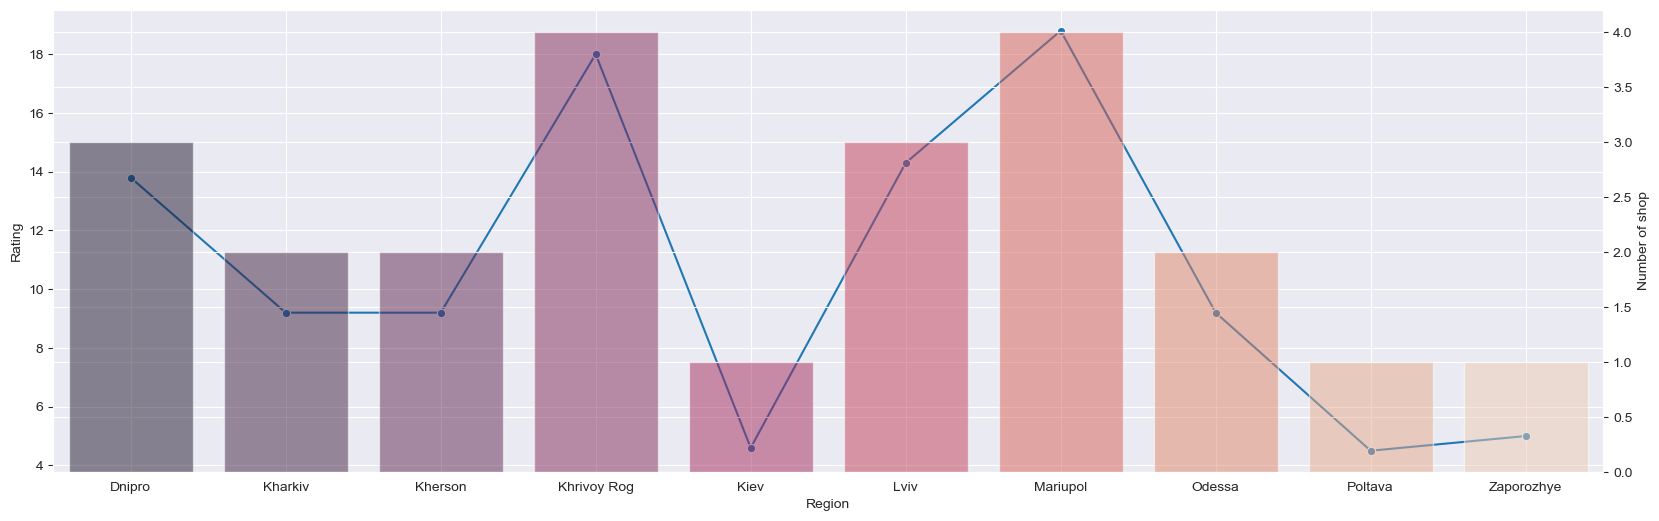

In [159]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style("darkgrid")
fig, ax1 = plt.subplots(figsize=(20,6))
sns.lineplot(data = Rating_by_all_service, 
             marker='o', 
             sort = False, 
             ax=ax1)

ax2 = ax1.twinx()
sns.barplot(y = "all_service",
            x = "Region",
            data = all_service,
            palette = "rocket", 
            alpha = 0.5,
            ax=ax2)

ax1.set_xlabel("Region")
ax1.set_ylabel("Rating")
ax2.set_ylabel("Number of shop")


As we can see in the chart above, Khrivoy Rog and Mariupol are the two cities with the most stores with all options. Followed by Lviv and Dnipro 2nd most.

But when looking at the ratings of cities, we can see that Mariupol has the highest Rating and cities with 1 store with all options are quite low.

This means that the Delivery option, Dine in option and Takeout option are related to the Rating of the store.